<a href="https://colab.research.google.com/github/sushantsp/Hackathons/blob/master/Copy_of_Airplane%2BCrash%2BSeverity%2BANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   Dataset  'Getting started.pdf'


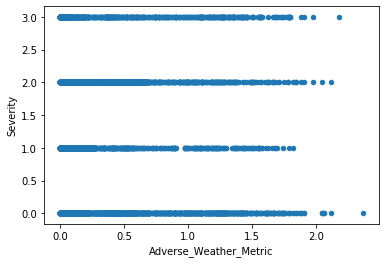

In [0]:
import pandas as pd

train = pd.read_csv('/content/drive/My Drive/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Dataset/test.csv')

train.dtypes

train.Violations.value_counts()

train.Accident_Type_Code.value_counts() 

train.columns

train = pd.get_dummies(train, columns =['Accident_Type_Code','Violations'])
test = pd.get_dummies(test, columns =['Accident_Type_Code','Violations'])

train.head()

train.columns

# train = train[['Accident_ID', 'Safety_Score', 'Days_Since_Inspection',
#        'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
#        'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric',
#        'Accident_Type_Code_1', 'Accident_Type_Code_2',
#        'Accident_Type_Code_3', 'Accident_Type_Code_4', 'Accident_Type_Code_5',
#        'Accident_Type_Code_6', 'Accident_Type_Code_7', 'Violations_0',
#        'Violations_1', 'Violations_2', 'Violations_3', 'Violations_4',
#        'Violations_5','Severity']]
train = train[['Accident_ID', 'Safety_Score', 'Days_Since_Inspection',
        'Control_Metric','Total_Safety_Complaints','Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric',
       'Accident_Type_Code_1', 'Accident_Type_Code_2',
       'Accident_Type_Code_3', 'Accident_Type_Code_4', 'Accident_Type_Code_5',
       'Accident_Type_Code_6', 'Accident_Type_Code_7', 'Violations_0',
       'Violations_1', 'Violations_2', 'Violations_3', 'Violations_4',
       'Violations_5','Severity']]

train.Severity.value_counts().sum()

train.Severity = train.Severity.map({'Highly_Fatal_And_Damaging':0,
                                     'Significant_Damage_And_Serious_Injuries':1,
                                     'Minor_Damage_And_Injuries':2,
                                     'Significant_Damage_And_Fatalities':3},)



# Adding Accident_ID as the first column to the test data.
# test = test[['Accident_ID','Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
#        'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
#        'Max_Elevation', 'Adverse_Weather_Metric',
#        'Accident_Type_Code_1', 'Accident_Type_Code_2', 'Accident_Type_Code_3',
#        'Accident_Type_Code_4', 'Accident_Type_Code_5', 'Accident_Type_Code_6',
#        'Accident_Type_Code_7', 'Violations_0', 'Violations_1', 'Violations_2',
#        'Violations_3', 'Violations_4', 'Violations_5']]

test = test[['Accident_ID','Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
        'Control_Metric','Turbulence_In_gforces', 'Cabin_Temperature',
       'Max_Elevation', 'Adverse_Weather_Metric',
       'Accident_Type_Code_1', 'Accident_Type_Code_2', 'Accident_Type_Code_3',
       'Accident_Type_Code_4', 'Accident_Type_Code_5', 'Accident_Type_Code_6',
       'Accident_Type_Code_7', 'Violations_0', 'Violations_1', 'Violations_2',
       'Violations_3', 'Violations_4', 'Violations_5']]

train.shape, test.shape # one extra column in train data which is the output.
# since ID's are not the part of the data input, they are saved into different columns and later will mapped onto
# the output data for submission.
Acc_ID_Train = train.Accident_ID
Acc_ID_Test = test.Accident_ID

# Dropping the Accident ID
train = train.iloc[:,1:]
test = test.iloc[:,1:]

train.shape, test.shape

# Create X_train, y_train and we have test data withour output.
X = train.iloc[:,0:-1]
y = train.iloc[:,[-1]] # severityb

%matplotlib inline
train.plot(x = 'Adverse_Weather_Metric',y = 'Severity', kind = 'scatter')

In [0]:
# import seaborn as sns
# sns.boxplot(x=train['Control_Metric'])

# ANN

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # Part 2 - Now let's make the ANN!
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
# classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# y_train = keras.utils.to_categorical(y_train, num_classes=4)
# y_test = keras.utils.to_categorical(y_test, num_classes=4)
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size =300 , epochs = 300)
y_pred = classifier.predict_classes(X_test)
# Predicting the Test set results

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = np.argmax(y_pred, axis=-1) 
cm = confusion_matrix(y_test, y_pred)
cm

Epoch 1/300
9500/9500 [==============================] - 0s 47us/step - loss: 1.3838 - acc: 0.3047
Epoch 2/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.3753 - acc: 0.3052
Epoch 3/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.3536 - acc: 0.3052
Epoch 4/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.3103 - acc: 0.3333
Epoch 5/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.2554 - acc: 0.4199
Epoch 6/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.2008 - acc: 0.4939
Epoch 7/300
9500/9500 [==============================] - 0s 6us/step - loss: 1.1569 - acc: 0.5142
Epoch 8/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.1254 - acc: 0.5201
Epoch 9/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.0956 - acc: 0.5327
Epoch 10/300
9500/9500 [==============================] - 0s 5us/step - loss: 1.0635 - acc: 0.5440
Epoch 11/300
9500/

array([[127,   3,  12,   8],
       [  5, 133,   6,  10],
       [  3,   8, 119,   1],
       [  2,   0,   0,  63]])

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="weighted"))

0.8845316141970967


In [0]:
test = sc.transform(test)
y_pred_sub = classifier.predict_classes(test)

In [0]:
y_pred_sub

array([3, 3, 2, ..., 2, 2, 3])

In [0]:
sub = pd.DataFrame(Acc_ID_Test)
sub['Severity'] = y_pred_sub.tolist()
sub.Severity = sub.Severity.map({0:'Highly_Fatal_And_Damaging',
                   1:'Significant_Damage_And_Serious_Injuries',
                   2:'Minor_Damage_And_Injuries',
                   3:'Significant_Damage_And_Fatalities'})
sub.to_csv("/content/drive/My Drive/Dataset/sample_submission_ann.csv",index = None, header=True)

#### Scatterplot with hue for output labels

In [0]:
import seaborn as sns

In [0]:
test = test[['Accident_ID','Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
        'Control_Metric','Turbulence_In_gforces', 'Cabin_Temperature',
       'Max_Elevation', 'Adverse_Weather_Metric',
       'Accident_Type_Code_1', 'Accident_Type_Code_2', 'Accident_Type_Code_3',
       'Accident_Type_Code_4', 'Accident_Type_Code_5', 'Accident_Type_Code_6',
       'Accident_Type_Code_7', 'Violations_0', 'Violations_1', 'Violations_2',
       'Violations_3', 'Violations_4', 'Violations_5']]

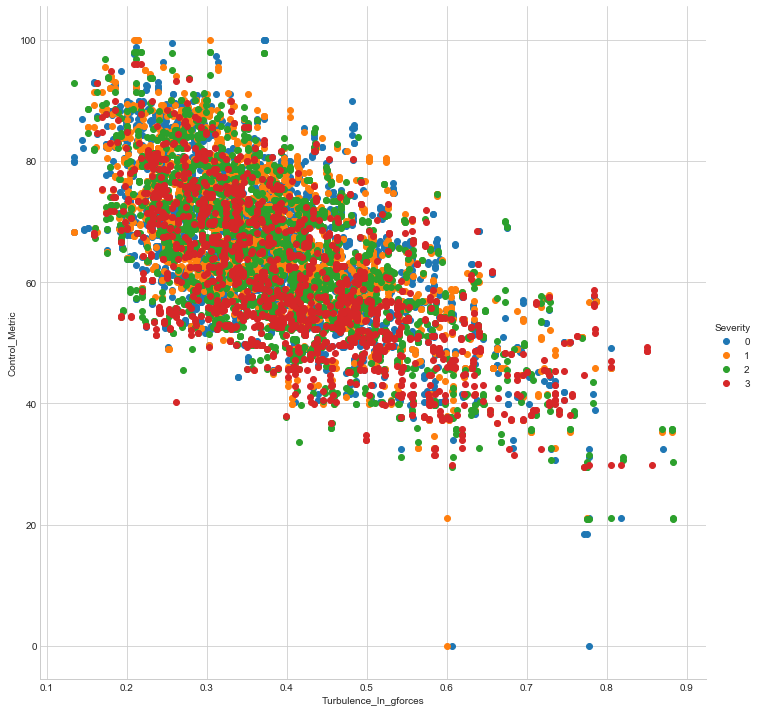

In [0]:

import matplotlib.pyplot as plt
sns.set_style('whitegrid');
# sns.FacetGrid(train, hue='Severity', size=10).map(plt.scatter, 'Safety_Score','Control_Metric').add_legend() IMP
sns.FacetGrid(train, hue='Severity', size=10).map(plt.scatter, 'Turbulence_In_gforces','Control_Metric').add_legend()


In [0]:
import plotly.express as px


ModuleNotFoundError: No module named 'plotly'